In [126]:
import numpy as np
import scipy as sp
import networkx as nx
import matplotlib.pyplot as plt
import sys

In [194]:
class Qubits(nx.DiGraph):
    def __init__(self, n):
        super().__init__()
        self.dim = n
        self.add_nodes_from([(0,0)] + [(i,j) for j in range(2) for i in range(1, n + 1)])
        for node in self.nodes:
            self.add_edge(node, node, weight = 0) # self-loops
        for i in range(1, n + 1):
            self.add_edge((0,0), (i, 0), weight = 0) # initial state
        # connect all (i,0) states to each other
        for i in range(1, n):
            for j in range(i+1, n + 1):
                self.add_edge((i,0), (j,0), weight = 0)
                self.add_edge((j,0), (i,0), weight = 0)
    
    def __str__(self):
        return "Qubits({})".format(self.dim)
    
    def __repr__(self):
        return str(self)
    
    def draw(self):
        pos = {node: (node[0]*2, node[1]/2) for node in self.nodes}
        nx.draw(self, pos, with_labels=True)
        plt.show()
        
    def get_edge_data(self, u, v, default={'weight': float('inf')}):
        edge_data = super().get_edge_data(u, v, default=default)
        if edge_data is None:
            return default
        return edge_data
        
    def measure(self, qubit):
        probs = [self[0][qubit]['weight'], 1 - self[0][qubit]['weight']]
        result = np.random.choice([0, 1], p=probs)
        self.remove_edge((0,0), (qubit, 1 - result))
        self[(0,0)][(qubit, result)]['weight'] = 1
        return result
        
        

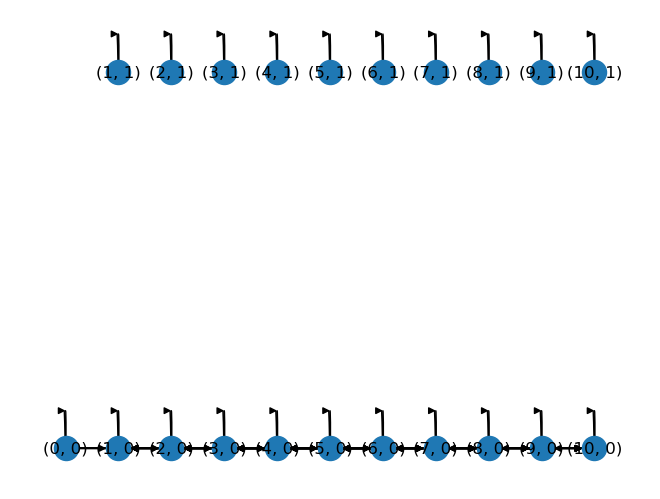

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1)]
[((0, 0), (0, 0)), ((0, 0), (1, 0)), ((0, 0), (2, 0)), ((0, 0), (3, 0)), ((0, 0), (4, 0)), ((0, 0), (5, 0)), ((0, 0), (6, 0)), ((0, 0), (7, 0)), ((0, 0), (8, 0)), ((0, 0), (9, 0)), ((0, 0), (10, 0)), ((1, 0), (1, 0)), ((1, 0), (2, 0)), ((1, 0), (3, 0)), ((1, 0), (4, 0)), ((1, 0), (5, 0)), ((1, 0), (6, 0)), ((1, 0), (7, 0)), ((1, 0), (8, 0)), ((1, 0), (9, 0)), ((1, 0), (10, 0)), ((2, 0), (2, 0)), ((2, 0), (1, 0)), ((2, 0), (3, 0)), ((2, 0), (4, 0)), ((2, 0), (5, 0)), ((2, 0), (6, 0)), ((2, 0), (7, 0)), ((2, 0), (8, 0)), ((2, 0), (9, 0)), ((2, 0), (10, 0)), ((3, 0), (3, 0)), ((3, 0), (1, 0)), ((3, 0), (2, 0)), ((3, 0), (4, 0)), ((3, 0), (5, 0)), ((3, 0), (6, 0)), ((3, 0), (7, 0)), ((3, 0), (8, 0)), ((3, 0), (9, 0)), ((3, 0), (10, 0)), ((4, 0), (4, 0)), ((4, 0), (1, 0)), ((4, 0), (2, 0)), ((4, 0), (3, 0)), ((4, 0), (5, 0

In [195]:
q = Qubits(10)
q.draw()
print(q.nodes)
print(q.edges)
a = nx.to_numpy_array(q)
b = sp.sparse.csr_matrix(a)
print(b)

In [196]:
q.measure((1,0))

KeyError: 0

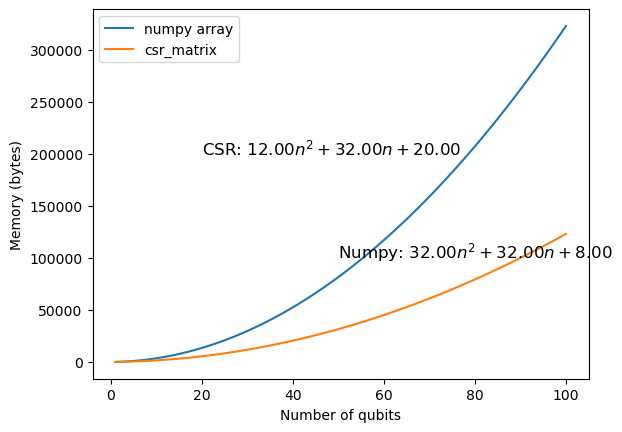

In [138]:
sizes = np.arange(1, 101)
npi = [nx.to_numpy_array(Qubits(n)) for n in sizes]
csrs = [sp.sparse.csr_matrix(n) for n in npi]
memory_np = np.array([n.nbytes for n in npi])
memory_csr = np.array([csr_matrix_example.data.nbytes +
                      csr_matrix_example.indices.nbytes +
                      csr_matrix_example.indptr.nbytes for csr_matrix_example in csrs])
plt.plot(sizes, memory_np, label='numpy array')
plt.plot(sizes, memory_csr, label='csr_matrix')
plt.xlabel('Number of qubits')
plt.ylabel('Memory (bytes)')
# get quadratic fit for numpy array
fit = np.polyfit(sizes, memory_np, 2)
plt.text(50, 1e5, f'Numpy: ${fit[0]:.2f}n^2 + {fit[1]:.2f}n + {fit[2]:.2f}$', fontsize=12)
fit = np.polyfit(sizes, memory_csr, 2)
plt.text(20, 2e5, f'CSR: ${fit[0]:.2f}n^2 + {fit[1]:.2f}n + {fit[2]:.2f}$', fontsize=12)

plt.legend()
plt.show()